In [6]:
# Can create one plot for all 3 tasks at once

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
models = {
    "vit_b_16": {"vit": True},
    "swin_b": {"vit": True},
    "beit_b_16": {"vit": True},
    "deit_b_16": {"vit": True},
    "vgg19": {"vit": False},
    "resnet50": {"vit": False},
    "efficientnetv2_m": {"vit": False},
    "convnext_b": {"vit": False}
}

method = "ots"
type_dir = f"/home/vincent/Documenten/BachelorsProject/GitHub_Repo/results/{method}_type"
mat_dir = f"/home/vincent/Documenten/BachelorsProject/GitHub_Repo/results/{method}_mat"
artist_dir = f"/home/vincent/Documenten/BachelorsProject/GitHub_Repo/results/{method}_artist"

target_dir = "/home/vincent/Documenten/BachelorsProject/GitHub_Repo/results/"

In [9]:
def addCsvs(models, dir, task):
    for file in os.scandir(dir):
        if file.is_file():
            for model in models:
                if model in file.name:
                    models[model][task] = file.path

addCsvs(models, type_dir, "type")
addCsvs(models, mat_dir, "mat")
addCsvs(models, artist_dir, "artist")

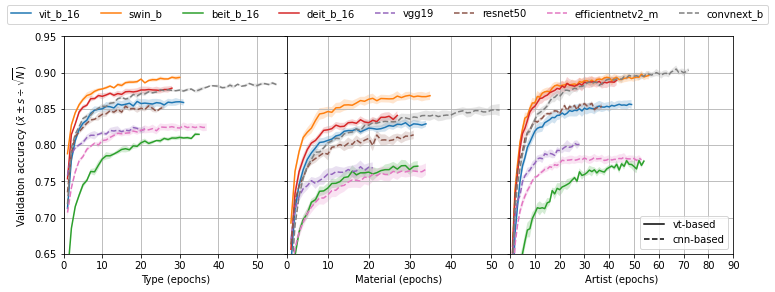

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)

def plotExperiment(task, ax):
    forlegend = []
    for model in models:
        df = pd.read_csv(models[model][task])

        x = [idx + 1 for idx in range(len(df))]
        NaNmask = np.zeros((len(x)))
        for c in [f"loss{idx}" for idx in range(5)]:
            NaNmask = NaNmask * df[c].to_numpy()

        y = np.array(df["mean_acc"].to_list()) + NaNmask
        ybott = np.array(df["low_bound_acc"].to_list()) + NaNmask
        ytop = np.array(df["up_bound_acc"].to_list()) + NaNmask

        ls = "-" if models[model]["vit"] else "--"
        fl, = ax.plot(x, y, label=model, linestyle=ls)
        forlegend += [fl]
        ax.fill_between(x, y1=ybott, y2=ytop, alpha=0.2)
    
    ax.grid()
    ax.set_xlabel({"type": "Type", "mat": "Material", "artist": "Artist"}[task] + " (epochs)")
    ax.set_xlim(left=0)
    ax.set_xticks(np.arange(0, np.max(ax.get_xticks()), 10))

    return forlegend

plotExperiment("type", ax1)
plotExperiment("mat", ax2)
forlegend = plotExperiment("artist", ax3)

types =  [  plt.Line2D([0], [0], color='black', linestyle="-"),
                plt.Line2D([0], [0], color='black', linestyle="--")]

fig.legend(forlegend, [model for model in models], loc='upper center', ncol=len(forlegend))
ax3.legend(types, ['vt-based', 'cnn-based'], loc='lower right')

ax1.set_ylim(top=0.95, bottom=0.65)
ax1.set_ylabel(r"Validation accuracy ($\bar{x} \pm s \div \sqrt{N}$)")

plt.subplots_adjust(wspace=.0)
fig.set_size_inches(12, 4)
# plt.show()
plt.savefig(os.path.join(target_dir, f"{method}_mean_accuracy.svg"), format="svg")